# Projeto 5 - Previsão de Gasto e Segmentação de Clientes

# Nova seção

O conjunto de dados lista informações de compras de clientes de um distribuidor. Inclui as despesas anuais em unidades monetárias (m.u.) em diversas categorias de produtos.

Objetivo: Analisar os dados, responder as perguntas abaixo, fazer uma previsão do gasto com produtos de higiene a partir dos gastos com supermercado e fazer uma segmentação de clientes utilizando compras no supermercado e produtos de limpeza utilizando linguagem Python.

Fonte do dataset: https://www.kaggle.com/datasets/sahistapatel96/wholesale-customer-datacsv

In [1]:
#Versão da Linguagem Python
from platform import python_version
print("Versão python utilizada neste projeto: ", python_version())

Versão python utilizada neste projeto:  3.9.13


In [2]:
#Instala o pacote watermark. 
!pip install -q -U watermark

In [3]:
# Imports
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel)
%matplotlib inline
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split #utilizada para dividir o dataset entre dados de entrada e saída
from sklearn.linear_model import LinearRegression  #biblioteca que contém o modelo de regressão linear
from sklearn import metrics #utilizada para avaliar o modelo desenvolvido
from sklearn.metrics import r2_score  #utilizada para calcular o R2
from sklearn.cluster import KMeans #biblioteca para realizar a construção do algoritmo não supervisionado K-means

In [4]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

sklearn   : 1.0.2
seaborn   : 0.11.2
numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2



Carregando o Dataset

In [6]:
#Carregando o  dataset
df = pd.read_csv('wholesale_customers_data.csv')

In [7]:
# Verificando o tipo do objeto
type(df)

pandas.core.frame.DataFrame

In [8]:
#Verificando quantas linhas e colunas tem o dataset
df.shape

(440, 8)

In [9]:
#Total de registros considerando cada coluna
df.size

3520

In [10]:
#Verifica os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [11]:
#Amostra das 5 primeiras linhas
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
#Amostra das 5 últimas linhas
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


1. FRESH: total anual gasto em produtos frescos;
2. MILK: total anual gasto em produtos derivados do leite;
3. GROCERY: total anual gasto em produtos de supermercado;
4. FROZEN: total anual gasto em produtos congelados;
5. DETERGENTS_PAPER: total anual gasto em produtos de limpeza;
6. DELICATESSEN: total anual gasto em produtos de delicatessen;
7. CHANNEL: tipo do canal de compra do consumidor (1- Horeca(hotel/restaurante/cafés) 2- varejo)
8. REGION: região do consumidor

In [13]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [14]:
#Colunas dos conjunto de dados
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [15]:
#Método value_counts() para cada tipo de dado
df.dtypes.value_counts()

int64    8
dtype: int64

In [16]:
#Verificando se há registros duplicados
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [17]:
#Verificando se há valores ausentes
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [18]:
#Verificando os tipos de canal de compra e as quantidades de cada canaL
tipos_canal_compra = df['Channel'].value_counts()
print(tipos_canal_compra)

1    298
2    142
Name: Channel, dtype: int64


In [19]:
#Verificando os tipos de região e as quantidades de cada região
tipos_regiao = df['Region'].value_counts()
print(tipos_regiao)

3    316
1     77
2     47
Name: Region, dtype: int64


In [20]:
#Analisando dados estatísticos das variáveis tipo inteiro
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Perguntas

1- Qual é a valor médio de gasto anual com derivados do leite (Milk)?

In [21]:
#Filtrando por derivados de leite e calculando a média
df_medio_leite = df['Milk'].mean()
print(df_medio_leite)

5796.265909090909


2- Qual é o maior valor gasto com produtos congelados (Frozen)?

In [22]:
#Filtrando por produtos congelados e destacando o valor maior
df_maior_congelados = df['Frozen'].max()
print(df_maior_congelados)

60869


In [23]:
#Verificando o resultado
df_congelados = df['Frozen'].sort_values(ascending=False)
print(df_congelados)

325    60869
183    36534
93     35009
196    18711
103    18028
       ...  
145       42
57        38
65        36
38        33
420       25
Name: Frozen, Length: 440, dtype: int64


3- Existem outliers (anomalias) nos dados para as colunas Fresh e Grocery?

<AxesSubplot:>

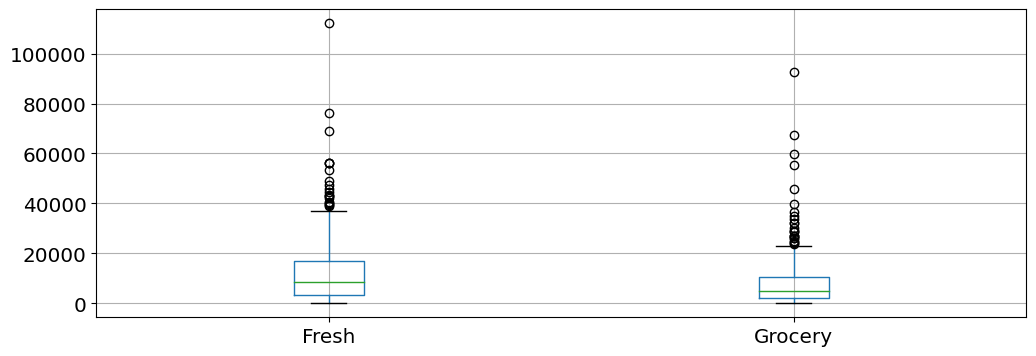

In [24]:
#Criando o Boxplot
df.boxplot(column=['Fresh','Grocery'])

Sim. Pode-se observar que há muitos valores acima de Q3.

4- Por meio de um gráfico, o que podemos dizer sobre a distribuição de clientes por região?

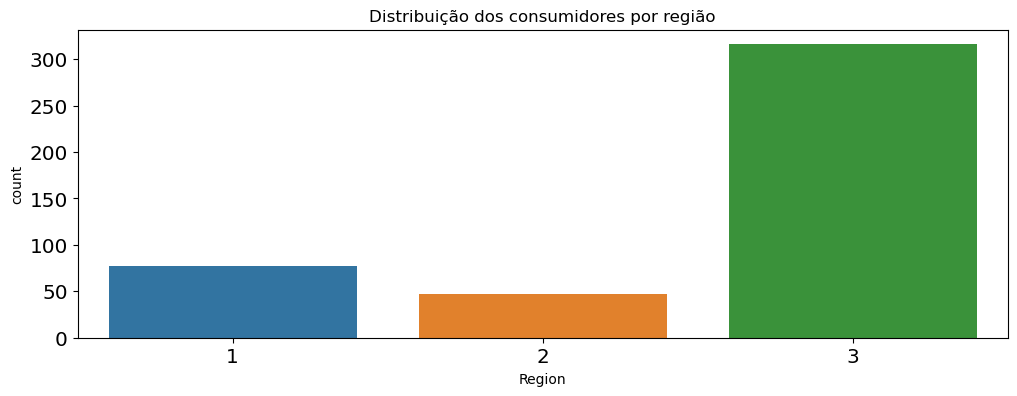

In [25]:
#Analisando a distribuição dos clientes por região com um gráfico utilizando seaborn
sns.countplot(x='Region', data=df); # cria o gráfico que conta a quantidade de consumidores existente em cada uma das regiões
plt.title('Distribuição dos consumidores por região');  

Há mais clientes na região 3.

5- Qual a distribuição dos consumidores pelo gasto com produtos derivados do leite?

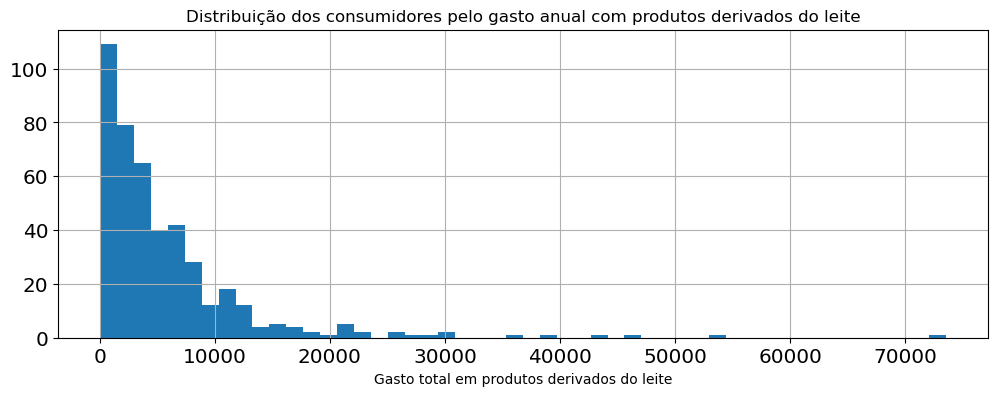

In [26]:
#Criando o Histograma
df.hist('Milk', bins=50);  #Os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos consumidores pelo gasto anual com produtos derivados do leite');
plt.xlabel('Gasto total em produtos derivados do leite');

6- Analisando o gráfico anterior (histograma dos gastos com leite), o que podemos dizer sobre o valor anual gasto com produtos derivados do leite (Milk)?

A maioria do gasto anual com produtos derivados do leite é até 10000.

7- Analisando um histograma dos gastos por tipo de canal (1 ou 2), o que podemos dizer sobre o valor anual gasto com produtos derivados do leite (Milk) por canal de consumo?

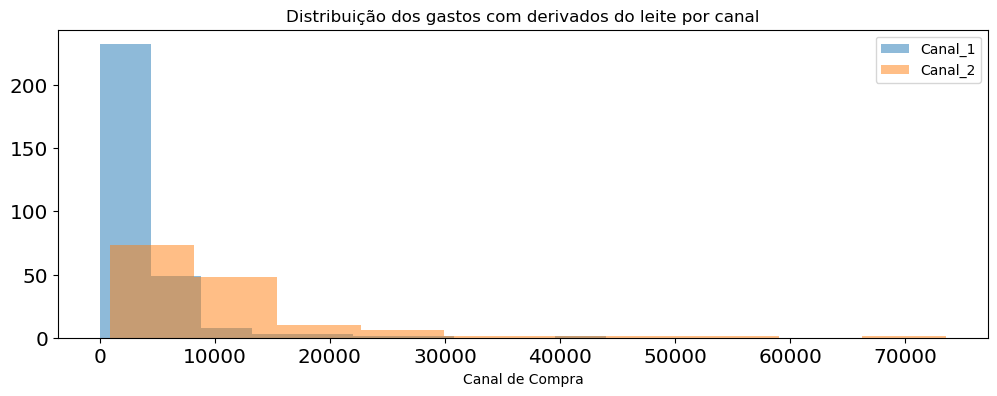

In [27]:
#Criando um Histrograma por Tipo de Canal
canal_1=df[df['Channel']==1] #Selecionando o canal 1
canal_2= df[df['Channel']==2] #Selecionando o canal 2
plt.hist('Milk', data=canal_1, alpha=0.5, label='Canal_1'); #Criando o histograma apenas para o canal 1
plt.hist('Milk', data=canal_2, alpha=0.5, label='Canal_2'); #Criando o histograma apenas para o canal 2
plt.title('Distribuição dos gastos com derivados do leite por canal'); 
plt.xlabel('Canal de Compra'); 
plt.legend(); #adicionando a legenda

8- Quais os gastos anuais com produtos de supermercado (pão, cereal, molhos etc)?

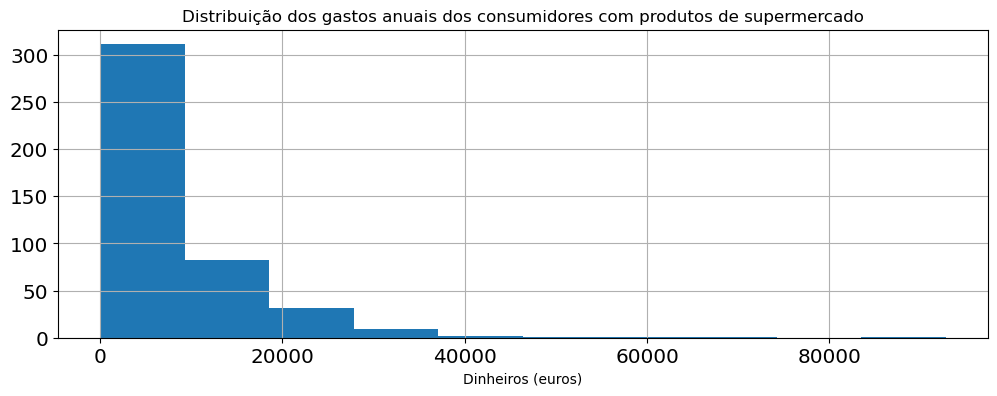

In [28]:
#Criando um histograma para os os gastos totais dos consumidores com produtos de supermercado
df.hist('Grocery');  
plt.title('Distribuição dos gastos anuais dos consumidores com produtos de supermercado'); 
plt.xlabel('Dinheiros (euros)');

9- Analisando o gráfico anterior (histograma dos gastos com produtos de supermercado), o que podemos dizer sobre o padrão de consumo dos consumidores?

A maioria do gasto anual com produtos de supermercado é até 10000.

10- Qual o impacto da região nos gastos com supermercado?

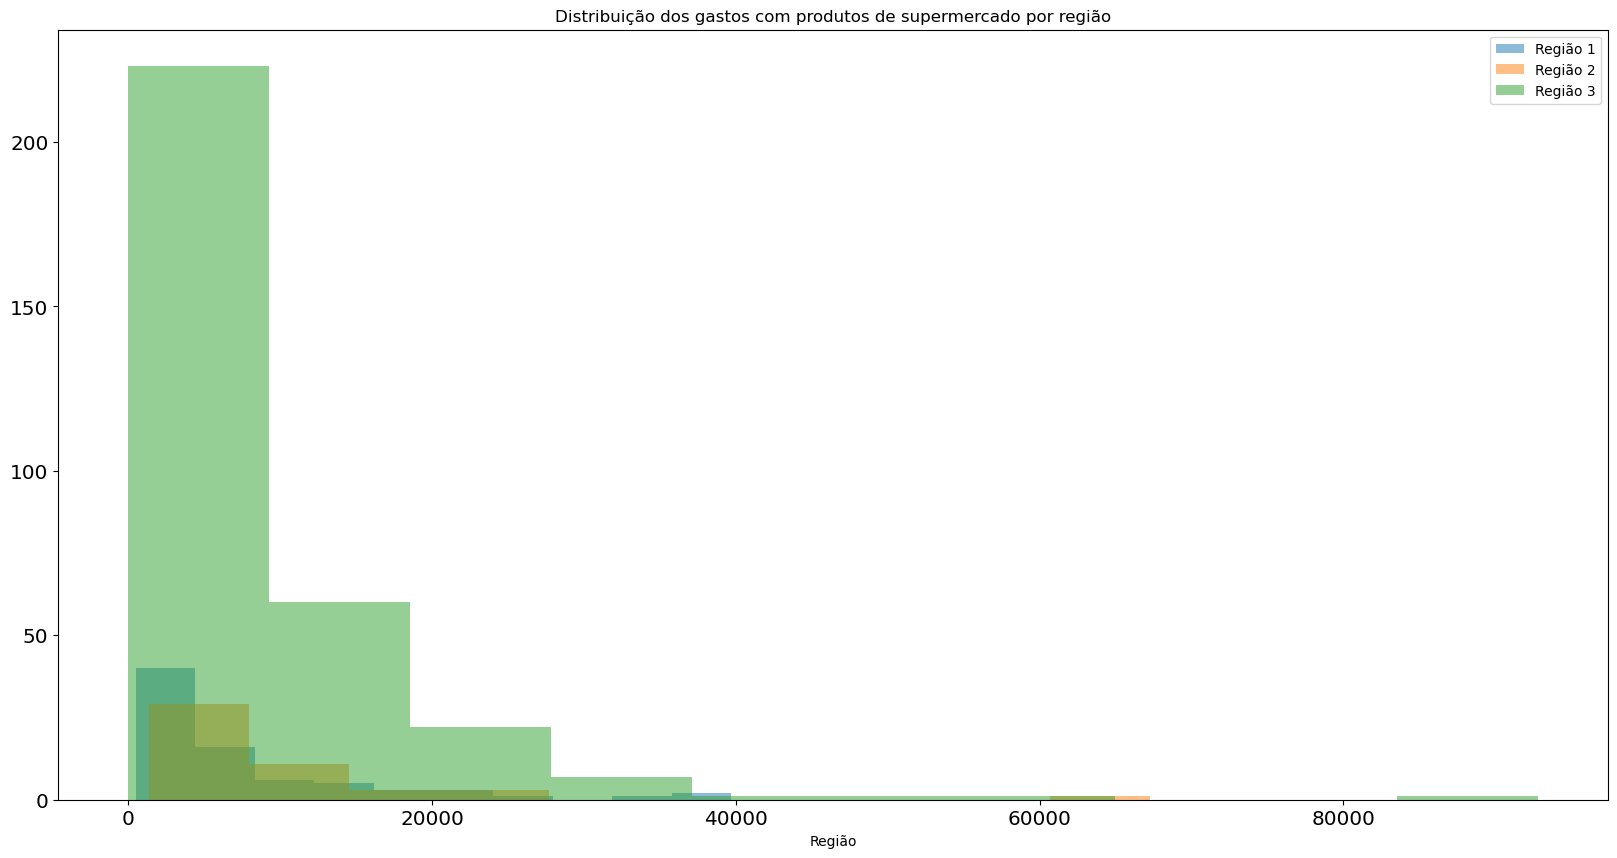

In [29]:
#Criando um Histograma por Região
plt.figure(figsize=(20,10))

regiao_1=df[df['Region'] == 1]
regiao_2=df[df['Region'] == 2]
regiao_3=df[df['Region'] == 3]

plt.hist('Grocery', data=regiao_1, alpha=0.5, label='Região 1');
plt.hist('Grocery', data=regiao_2, alpha=0.5, label='Região 2');
plt.hist('Grocery', data=regiao_3, alpha=0.5, label='Região 3');

plt.title('Distribuição dos gastos com produtos de supermercado por região');
plt.xlabel('Região');
plt.legend();

11- Analisando o gráfico anterior (distribuição gastos com produtos de supermercado por região), o que podemos dizer sobre o padrão de consumo dos consumidores?

O padrão de consumo com produtos de supermercado é semelhante. Destaca-se que a Região 3 tem mais consumidores por possuir mais clientes.

12- Qual a média de gastos dos clientes por região?

In [30]:
#Verificando os dados dos consumidores em cada região
regiao_1=df[df['Region'] == 1]
regiao_2=df[df['Region'] == 2]
regiao_3=df[df['Region'] == 3]

#Calculando os valores médios atribuídos a cada uma das regiões
print('Valor anual médio gasto pelos clientes da região 1: \n',regiao_1[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 
print('Valor anual médio gasto pelos clientes da região 2: \n',regiao_2[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 
print('Valor anual médio gasto pelos clientes da região 3: \n',regiao_3[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()) 

Valor anual médio gasto pelos clientes da região 1: 
 Fresh               11101.727273
Milk                 5486.415584
Grocery              7403.077922
Frozen               3000.337662
Detergents_Paper     2651.116883
Delicassen           1354.896104
dtype: float64
Valor anual médio gasto pelos clientes da região 2: 
 Fresh               9887.680851
Milk                5088.170213
Grocery             9218.595745
Frozen              4045.361702
Detergents_Paper    3687.468085
Delicassen          1159.702128
dtype: float64
Valor anual médio gasto pelos clientes da região 3: 
 Fresh               12533.471519
Milk                 5977.085443
Grocery              7896.363924
Frozen               2944.594937
Detergents_Paper     2817.753165
Delicassen           1620.601266
dtype: float64


<AxesSubplot:xlabel='Region'>

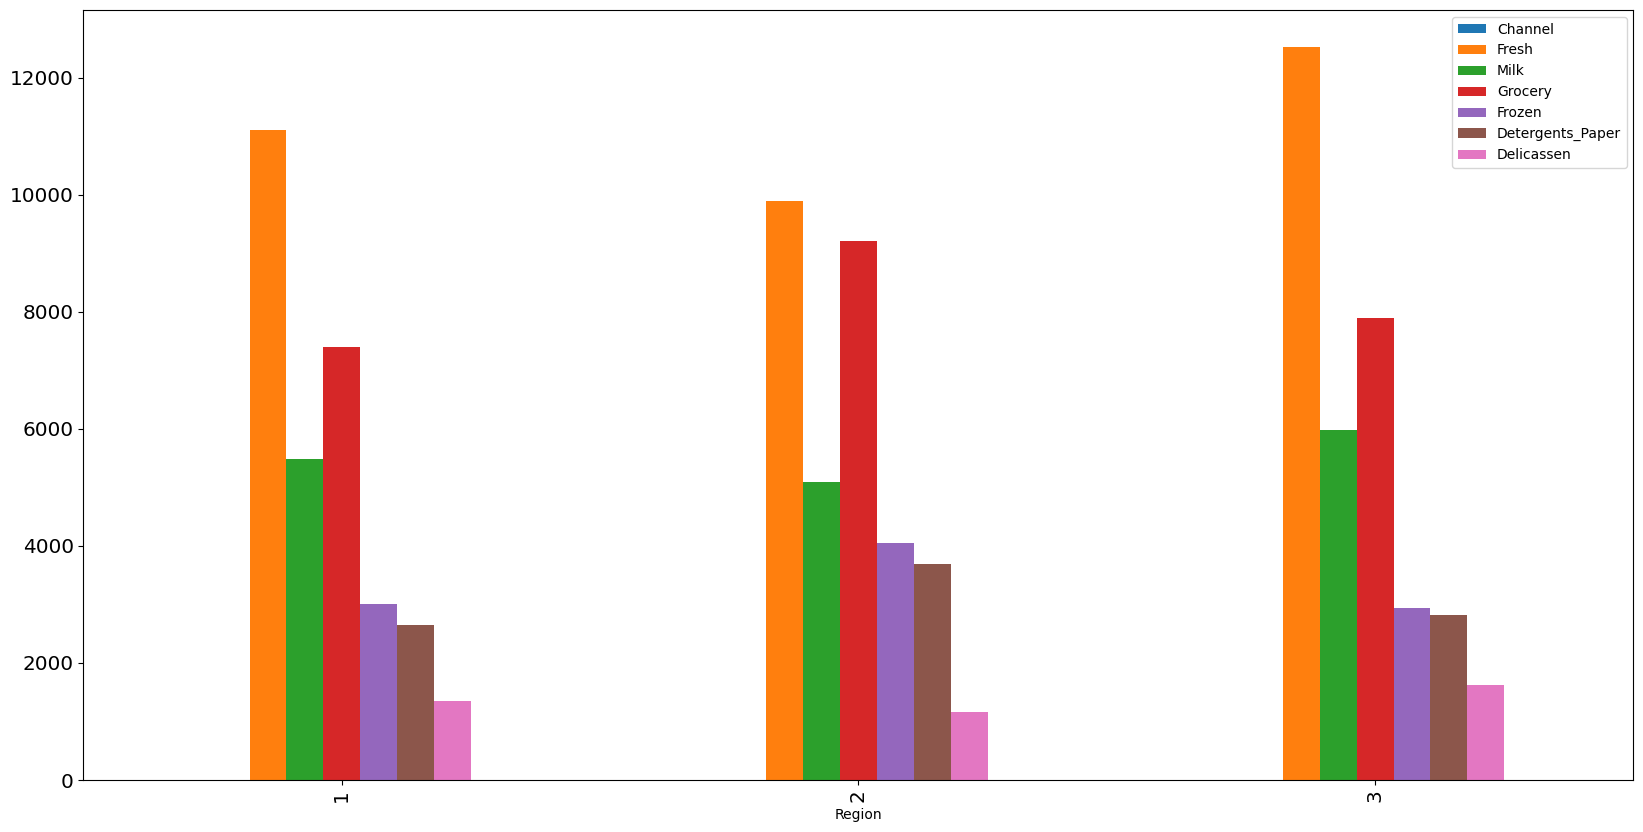

In [31]:
#Gráfico da média dos gastos por cada uma das regiões e tipo de produto consumido
df_mean=df.groupby('Region').mean() #agrupa por região e obtém os valores médios
df_mean.plot(kind='bar',figsize=(20,10))  #realiza o plot 

13- Qual o valor gasto com Delicassen e Supermercado pela região?

In [32]:
#Agrupando por Região e destacando os Tipos Delicassen' e 'Grocery'
df_valor = df.groupby('Region')['Delicassen', 'Grocery'].value_counts()
print(df_valor)

Region  Delicassen  Grocery
1       7           3316       1
        18          2216       1
        2876        4897       1
        6854        9490       1
        6372        15205      1
                              ..
3       70          1162       1
        65          10471      1
        64          1981       1
        63          610        1
        47943       20170      1
Length: 440, dtype: int64


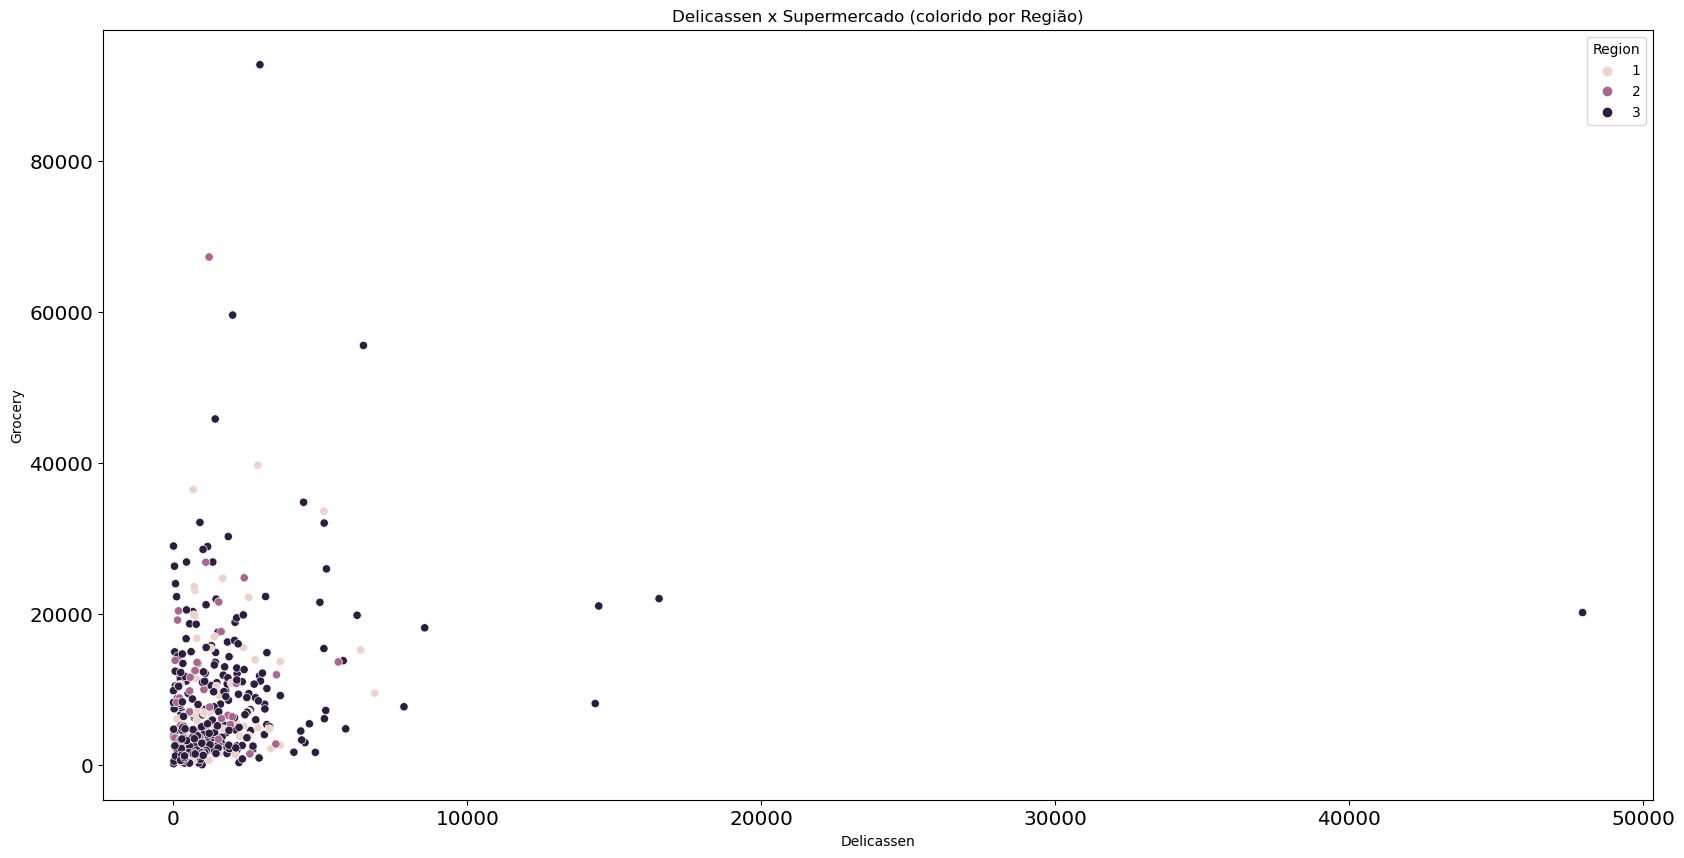

In [33]:
#Gráfico
plt.figure(figsize=(20,10))
sns.scatterplot('Delicassen', 'Grocery', hue='Region', data=df); 
plt.title('Delicassen x Supermercado (colorido por Região)'); 

14- Qual a correlação entre as variáveis?

<AxesSubplot:>

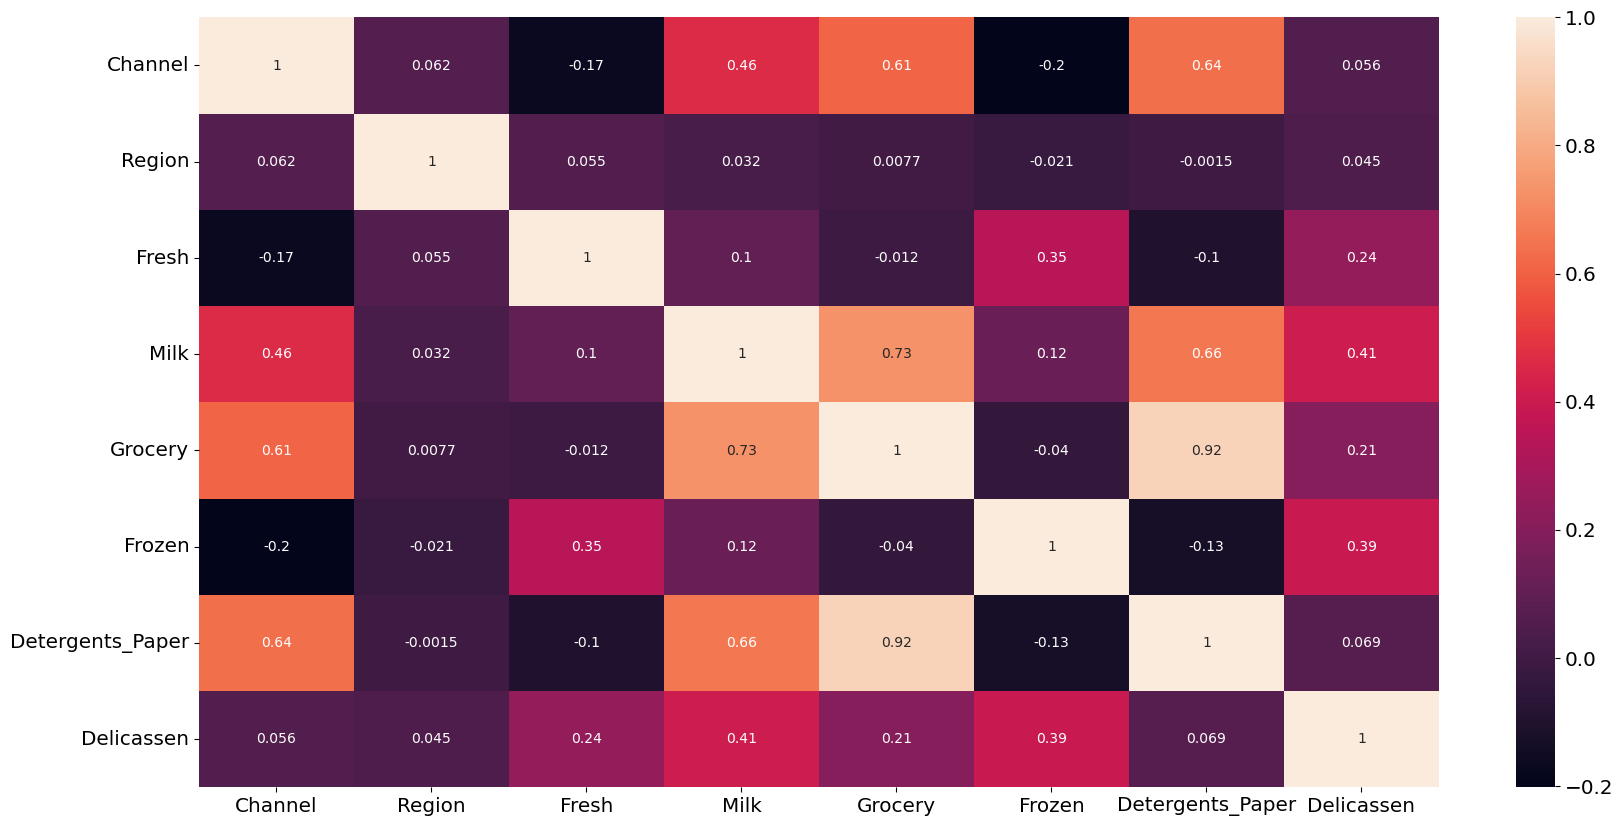

In [34]:
#Gráfico de calor com as correlações entre as variáveis
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(), annot=True) # desenha a matriz de correlação entre cada uma das variáveis

15- Analisando a correlação de Pearson entre os gastos com produtos de supermercado (Grocery) e produtos e higiene (Detergents_Paper), o que podemos dizer?

Podemos dizer que há uma correlação alta positiva, sendo de 0.92

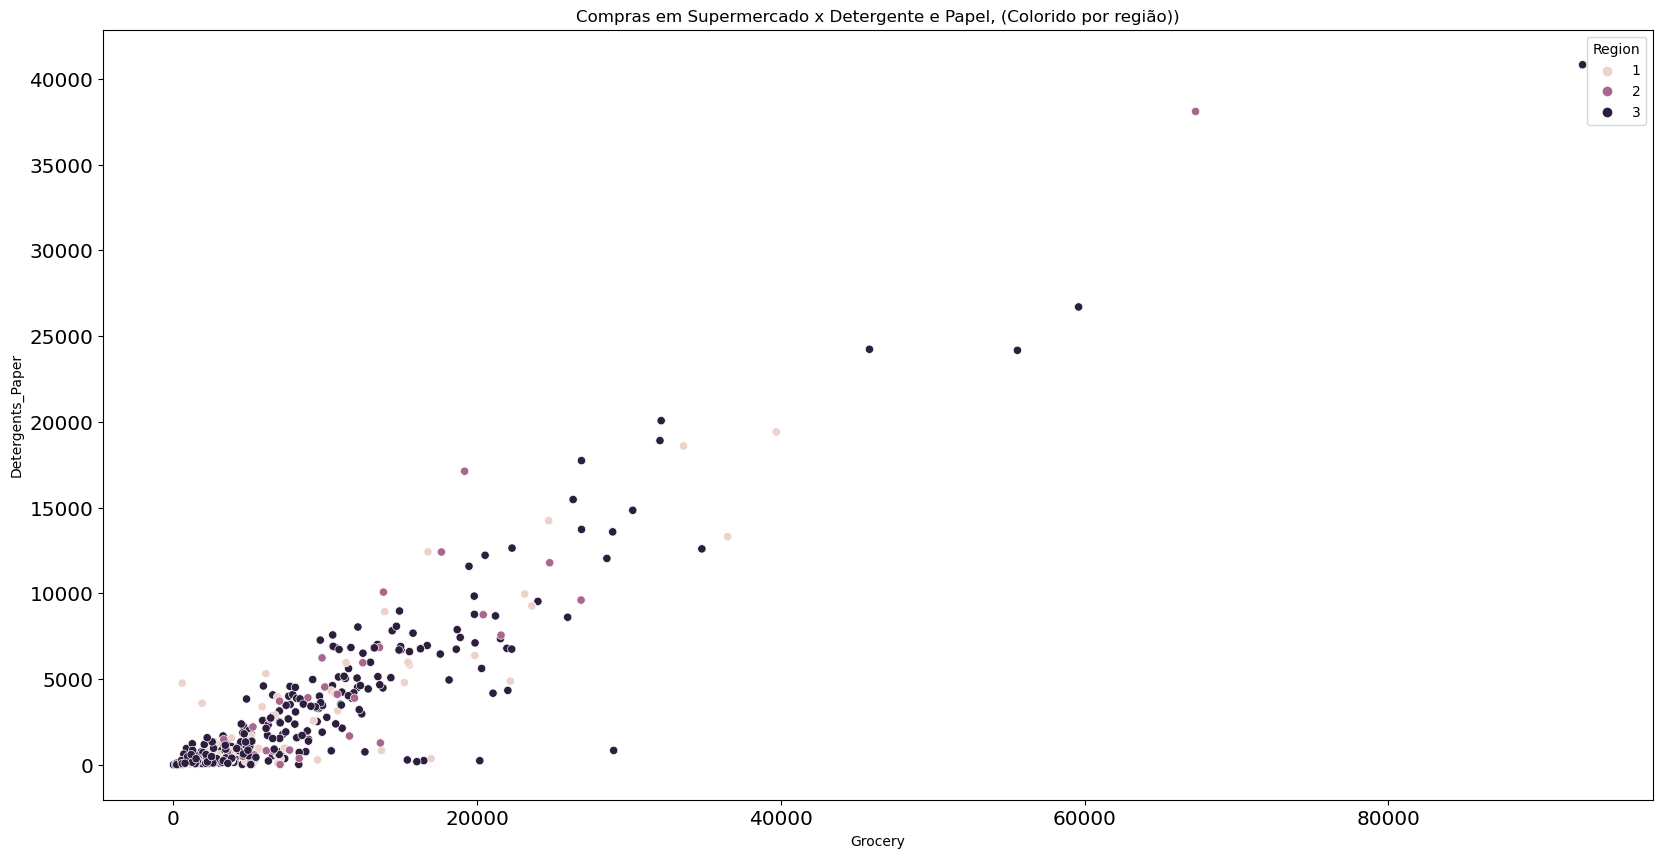

In [35]:
#Verificando a correlação pelo gráfico
plt.figure(figsize=(20,10))
sns.scatterplot('Grocery', 'Detergents_Paper', hue='Region', data=df); 
plt.title('Compras em Supermercado x Detergente e Papel, (Colorido por região))');

Aplicando a regressão linear - Prever o gasto com produtos de higiene a partir dos gastos com supermercado

In [36]:
#Modificando os dados para a entrada do algoritmo (transformando em uma matriz)
X = df['Grocery'].values.reshape(-1,1)  
y = df['Detergents_Paper'].values.reshape(-1,1)  

In [37]:
#Dividindo o dataframe em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
#Objeto para a construção do modelo de regressão linear e aplicação do treinamento do algoritmo
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

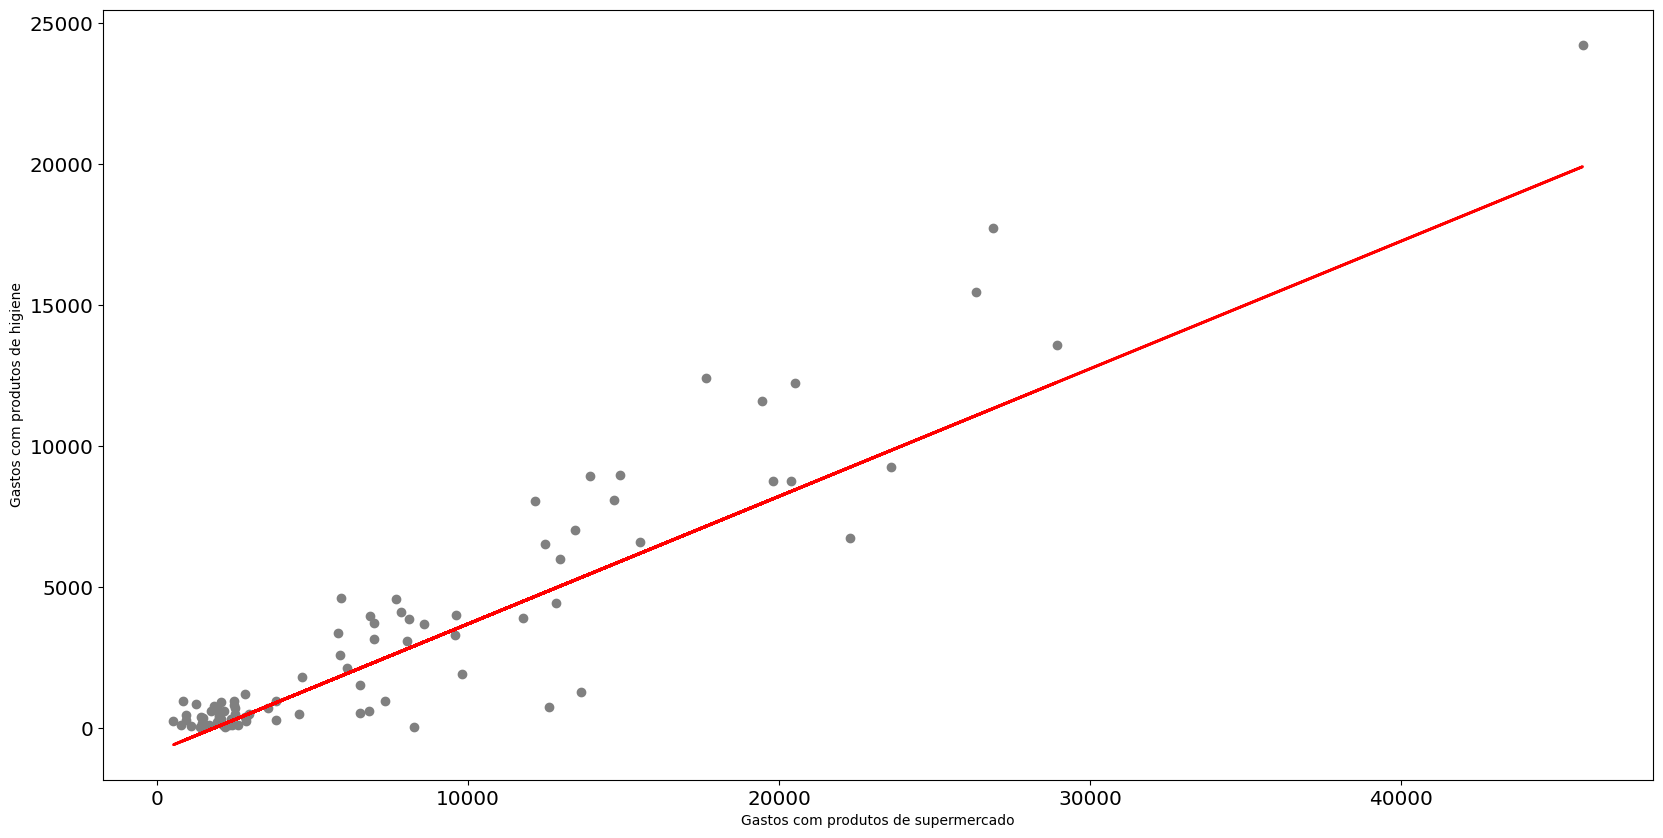

In [39]:
#Previsão do modelo de regressão
plt.figure(figsize=(20,10))
y_pred = regressor.predict(X_test) 
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Gastos com produtos de supermercado')
plt.ylabel('Gastos com produtos de higiene')
plt.show()

16- Qual é o coeficiente de determinação para o modelo de regressão encontrado?

In [40]:
#Calculando o coeficiente de determinação R2 para o modelo
r2_score(y_test,y_pred)

0.847492289734609

In [41]:
#Coeficientes da reta
print("A equação da reta é Y = {}*X {}".format(regressor.coef_[0],regressor.intercept_[0]))

A equação da reta é Y = [0.45264797]*X -839.4404680193988


In [42]:
#Realizando a previsão de gastos com produtos de higiene dado que o consumidor gastou 25000 com supermercado
regressor.predict(np.array([25000]).reshape(-1,1))

array([[10476.75872836]])

Correlações pela Região 1

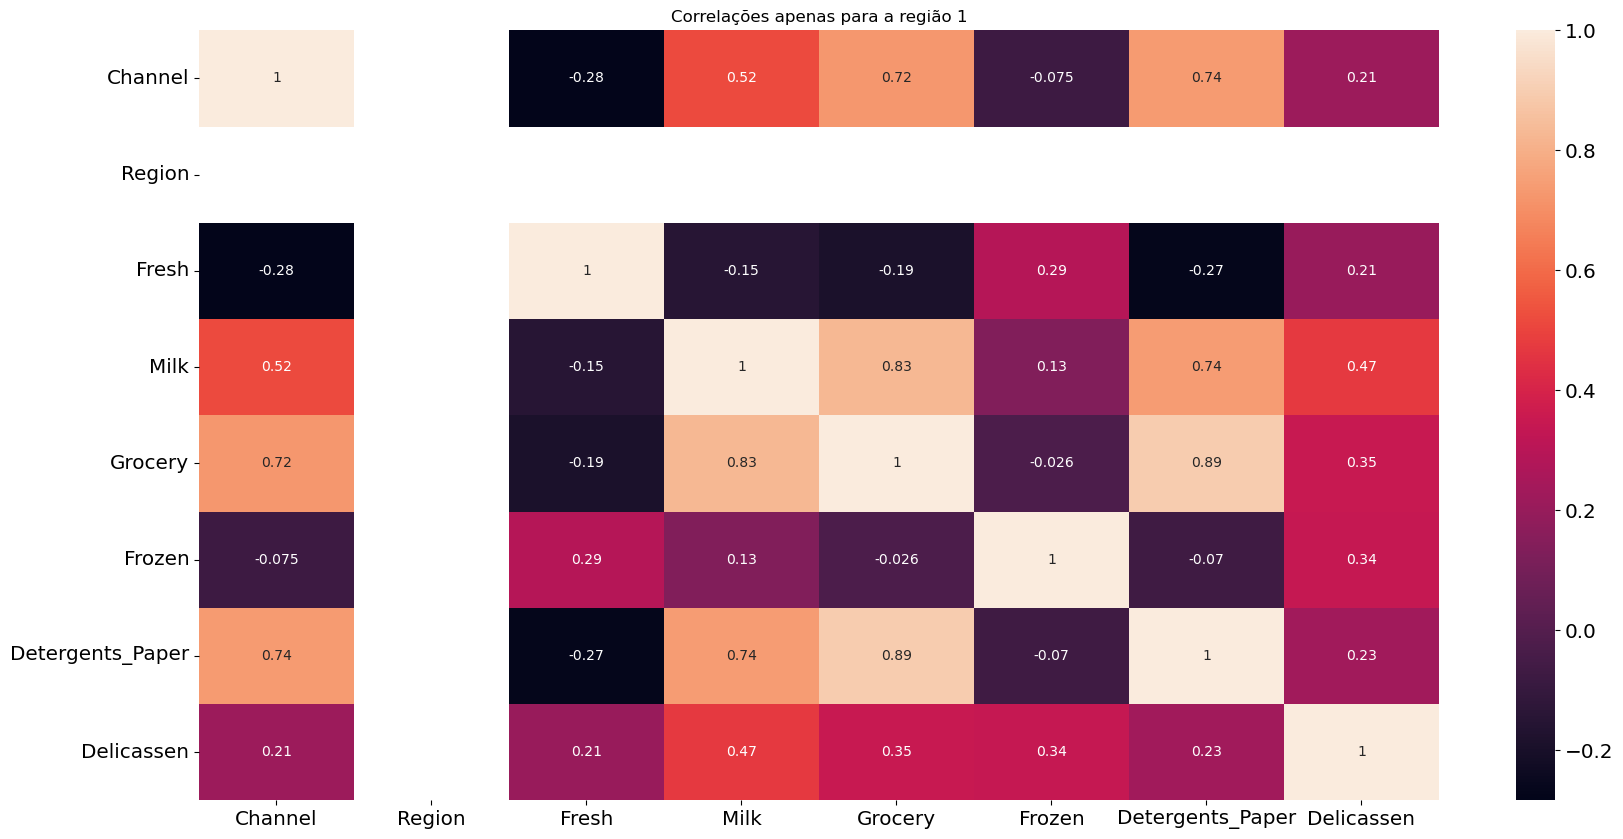

In [43]:
#Inserindo a matriz de correlação da região 1
plt.figure(figsize=(20,10))
sns.heatmap(regiao_1.corr(), annot=True); 
plt.title('Correlações apenas para a região 1'); 

17- Comparando a matriz de correlação total (todas as regiões) com a matriz de correlação apenas para região 1, o que podemos dizer sobre a correlação entre os gastos com produtos de supermercado (Grocery) e produtos e higiene (Detergents_Paper)?

A correlação entre estas variáveis continua sendo alta e positiva (0,89).

Segmentação de clientes utilizando compras no supermercado e produtos de limpeza.

In [44]:
#Obtendo os dados para a construção do banco de dados
segmentacao_1 = df[['Grocery' , 'Detergents_Paper']].iloc[: , :].values #transformando os dados em array

In [45]:
#Contruindo o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(segmentacao_1) #aplicando o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontrando os grupos

Text(0.5, 1.0, 'Segmentação de clientes por gastos com  Produots de supermercado x Produtos de higiene')

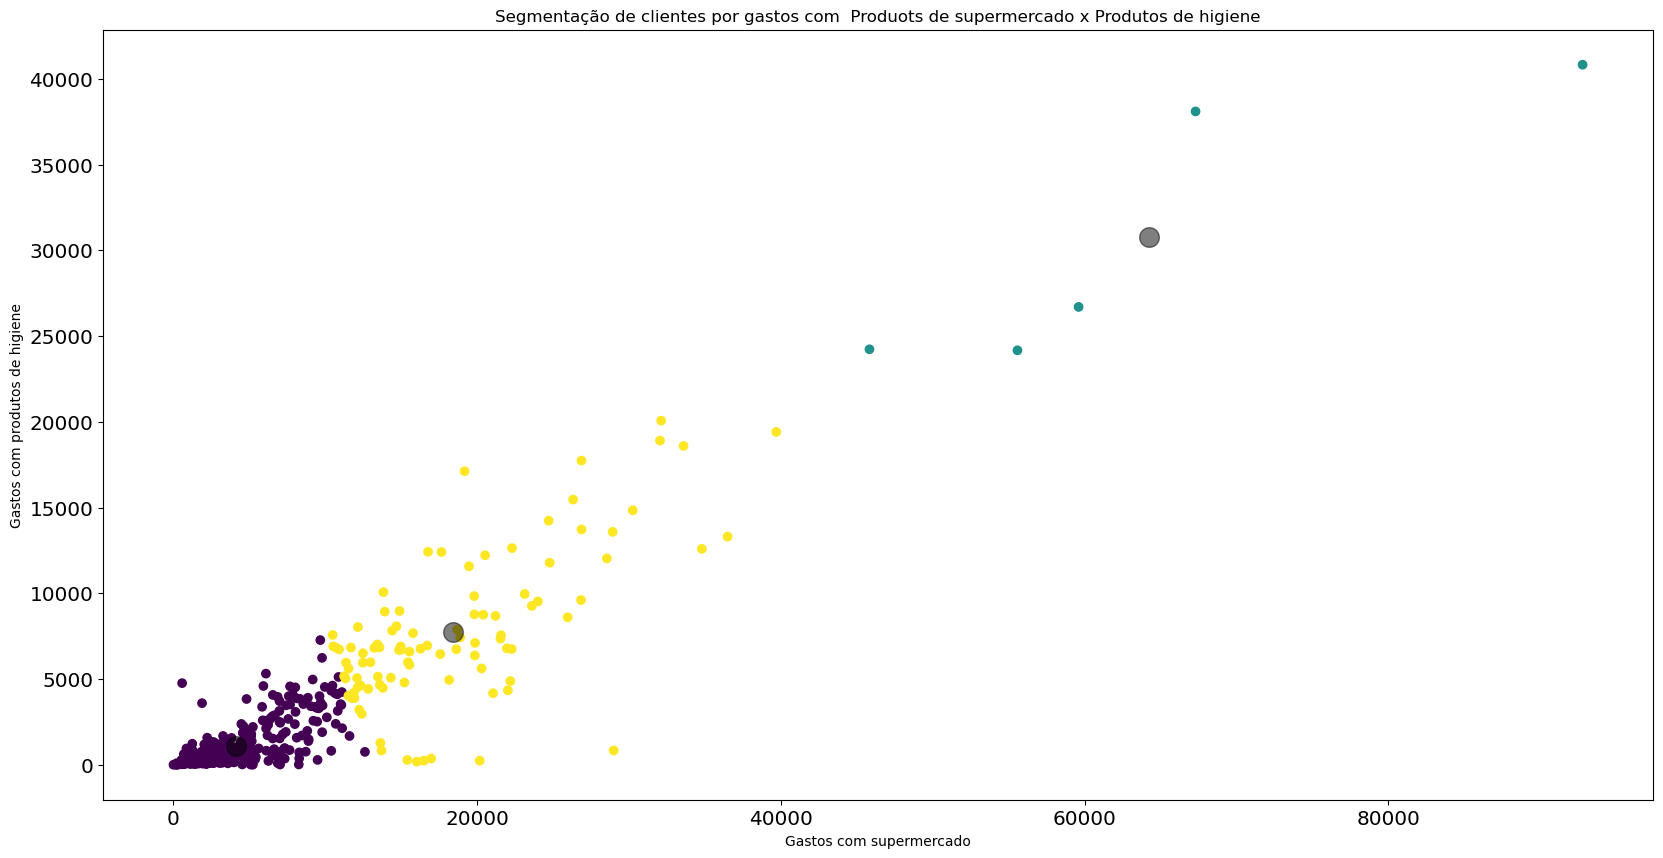

In [46]:
#Gráfico de dispersão com os grupos
plt.figure(figsize = (20 , 10) ) #Definindo o tamanho da figura
plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') 
centers = kmeans.cluster_centers_ #Encontrando os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #Realizando o plot de cada um dos grupos
plt.xlabel("Gastos com supermercado")  
plt.ylabel("Gastos com produtos de higiene") 
plt.title("Segmentação de clientes por gastos com  Produots de supermercado x Produtos de higiene")

Analisando a segmentação de clientes pelos gastos com supermercado e produtos de higiene, o que podemos dizer sobre os 3 grupos criados (clusters)?

Cada grupo possui uma média de gastos com supermercado e produtos de higiene diferentes.